In [24]:
import numpy as np
from numpy import *
import matplotlib
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


# Hausaufgabe 2

### Teil 1 - Implementierung der Verfahren von Heun und Euler
Implementieren sie das Verfahren von Heun und das explizite Euler-Verfahren zur Lösung von vektoriellen DGLs.

Expliziter Euler:
$$
    \mathbf{u}_{n+1} = \mathbf{u}_n + h\cdot \mathbf{f}(t_n,\mathbf{u}_n)
$$

In [25]:
def expeuler(fun,t0,u0,N,a):
    """""
    Implementation of the explicit euler scheme
    
    Input:
    fun ... function computing the right hand side dy = fun(t,y)
    t0  ... lower interal border  t0 <= t <= t+a
    u0  ... initial value u0 = y(t0)
    N   ... number of iterations
    a   ... positiv number for the length of the interval
    
    Output 
    t   ... time steps [t_0,t_1, ..., t_N]
    h   ... stepwidth
    u   ... numerical solution [u_0, u_1, ..., u_N]
    """""
    h = a / N
    u = np.zeros([np.size(u0),N+1])
    t = np.zeros(N+1)
    t[0] = t0
    u[:,0]=u0
    for i in range(N):
        u[:,i+1] = u[:,i] + h*fun(t[i],u[:,i]) 
        t[i+1] = t[i] + h
    return t, h, u



Verfahren von Heun:
$$
    \mathbf{u}_{n+1} = \mathbf{u}_n + \frac{h}{2}\cdot [\mathbf{f}(t_n,\mathbf{u}_n)+\mathbf{f}(t+h,\mathbf{u}_n+h \mathbf{f}(t,\mathbf{u}_n))]
$$

In [26]:
def heun(fun,t0,u0,N,a):
    """""
    Implementation of the heun scheme
    
    Input:
    fun ... function computing the right hand side dy = fun(t,y)
    t0  ... lower interal border  t0 <= t <= t+a
    u0  ... initial value u0 = y(t0)
    N   ... number of iterations
    a   ... positiv number for the length of the interval
    
    Output 
    t   ... time steps [t_0,t_1, ..., t_N]
    h   ... stepwidth
    u   ... numerical solution [u_0, u_1, ..., u_N]
    """""
    h = a / N
    u = np.zeros([np.size(u0),N+1])
    t = np.zeros(N+1)
    t[0] = t0
    u[:,0]=u0
    for i in range(N):
        dy = fun(t[i],u[:,i])
        u_plus = u[:,i] + h * dy
        t_plus= t[i] + h
        dy_plus= fun(t_plus, u_plus)
        
        
        phi = 0.5 * (dy + dy_plus)
        u[:,i+1] = u[:, i] + h * phi
        t[i+1] = t[i] + h
    return t, h, u


### Teil 2 - Vergleich der Verfahren

Wenden Sie beide Verfahren an, um die folgenden Testaufgaben im Interval $[0,a]$ numerisch zu losen:


1.) $a= 1.5$ 
 $$
 \begin{cases}
     y'=-\tan(t)y, &,\text{für } t\in [0,a]\\
     y(0) = 1,
 \end{cases}
 $$
 
 (exakte Lösung $y(t) = \cos(t)$),


2.) $a= 2$ 
$$
\begin{cases}
    y'=
    \begin{pmatrix}
         0 &1\\
        -e^{2t}&1
     \end{pmatrix}y(t)
    &,\text{for } t\in [0,a]\\
    y(0) =
    \begin{pmatrix}
        \sin(1)\\
        \cos(1)
    \end{pmatrix}
 \end{cases}
$$
, 


exakte Lösung: 
$$
y(t) =\begin{pmatrix}
\sin(e^t)\\ \cos(e^t)e^t
\end{pmatrix}
$$,

jeweils für $N= 10,50,100, 500$.


Text(0.5, 1.0, '$y(t)=-\\tan(t)y$')

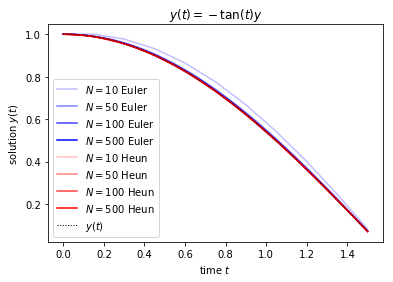

In [27]:
N_list = [10, 50, 100, 500] # Number of iterations
t0 = 0 # Starting time

# Differential Equation 1
a = 1.5
hlist1 = [a/N for N in N_list]
RHS = lambda t,y : - tan(t)*y
y0 = 1
y = lambda t: cos(t)

# euler scheme
error1={"euler":[], "heun":[]}
fig, ax = subplots()
transparency = 0
for N in N_list:
    transparency += 1/size(N_list)   
    # euler scheme
    t,h,u = expeuler(RHS,t0,y0,N,a)
    err = np.abs(u[0,-1]-y(t0+a))
    error1["euler"].append(err)
    plot(t,u[0,:],'b',alpha=transparency,label='$N='+ str(N)+'$ Euler')

transparency = 0
for N in N_list:
    transparency += 1/size(N_list)    
    # heun scheme
    t,h,u = heun(RHS,t0,y0,N,a)
    err = np.abs(u[0,-1]-y(t0+a))
    error1["heun"].append(err)
    plot(t,u[0,:],'r',alpha=transparency,label='$N='+ str(N)+'$ Heun')
    

plot(t,y(t),'k:',lw=1,label="$y(t)$")
legend()

xlabel('time $t$')
ylabel('solution $y(t)$')
title ('$y(t)=-\\tan(t)y$')

    


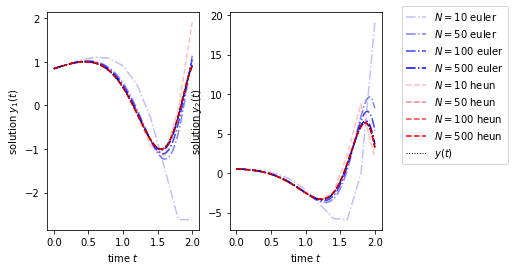

In [28]:
# Differential Equation 2
a = 2
hlist2 = [a/N for N in N_list]
RHS = lambda t,y : np.asarray([y[1], -y[0]*exp(2*t)+y[1]]).T
y0 = np.asarray([sin(1), cos(1)]).T
y = lambda t: np.asarray([sin(exp(t)),cos(exp(t))*exp(t)])

ax=[0,0]
# euler scheme
error2={"euler":[], "heun":[]}
plt.figure()
ax[0] = subplot(121)
ax[1] = subplot(122)

transparency = 0
for N in N_list:
    transparency += 1/size(N_list)    
    t,h,u = expeuler(RHS,t0,y0,N,a)
    err = np.linalg.norm(u[:,-1]-y(t[-1]),2)
    error2["euler"].append(err)
    ax[0].plot(t,u[0,:],'b-.',alpha=transparency,label='$N='+ str(N)+'$ euler')
    ax[1].plot(t,u[1,:],'b-.',alpha=transparency,label='$N='+ str(N)+'$ euler')


xlabel('time $t$')
ylabel('solution $y_1(t)$')


# heun scheme
transparency = 0
for N in N_list:
    transparency += 1/size(N_list)     
    t,h,u = heun(RHS,t0,y0,N,a)
    err = np.linalg.norm(u[:,-1]-y(t0+a),2)
    error2["heun"].append(err)
    ax[0].plot(t,u[0,:],'r--',alpha=transparency,label='$N='+ str(N)+'$ heun')
    ax[1].plot(t,u[1,:],'r--',alpha=transparency,label='$N='+ str(N)+'$ heun')

    
for i  in range(np.size(u,0)):   
    ax[i].plot(t,y(t)[i],'k:',lw=1,label="$y(t)$")
    ax[i].set_xlabel('time $t$')
    ax[i].set_ylabel('solution $y_'+str(i+1)+'(t)$')
ax[1].legend(bbox_to_anchor=(1.1, 1.05))
    



### Teil 3 - Konvergenz der Verfahren
Stelle den globalen Fehler
$$
    e_h(t_0+a) = \Vert u_h(t_0+a) - y(t_0+a)\Vert_2
$$
als Funktion von $h$ in einem LogLog-Plot dar und schätzen sie die Konvergenzordnung mit einer linearen Regression ab.


Since the error goes like $e_h = C h^\alpha$, we can estimate $\alpha$ in a linear regression using:
$$
    \ln e_h = \ln(C h^\alpha) = \underbrace{\ln(C)}_{\beta} + \alpha\ln(h)\,,
$$
with $\alpha,\beta>0$ as coefficients.
The following function will find $\alpha,\beta$ such that the least square error is minimized:

In [29]:
def logfit(h, err):
    """ This is a small function that returns the logfit, i.e. the least
    squares fit to the log of the two passed lists.
    """
    import numpy as np

    if len(h) != len(err):
        raise ValueError('Convergence order args do not have same length')

    A = np.ones([len(err), 2])
    B = np.ones([len(err), 1])
    # ERR = A*N + B
    for i in range( len(h) ) :
        A[i,0] = np.log10(h[i])
        B[i] = np.log10(err[i])

    x, residuals, rank, singval  = np.linalg.lstsq(A,B,rcond=-1)
    return x


The convergence order can be read from the slope of the fitted lines in the loglog plot.

Text(0, 0.5, 'error')

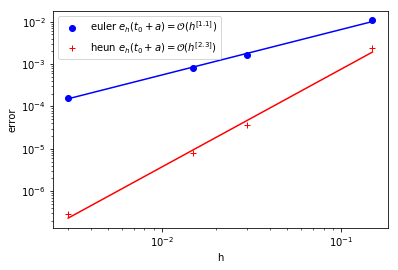

In [37]:
# comparison
fig, ax = subplots()
alpha = logfit(hlist1,error1["euler"])
ax.loglog(hlist1,error1["euler"],'bo',label='euler $e_h(t_0+a)=\mathcal{O}(h^{'+str(np.round(alpha[0],1))+'})$')
ax.loglog(hlist1,10**alpha[1]*hlist1**alpha[0],'b')

alpha = logfit(hlist1,error1["heun"])
ax.loglog(hlist1,error1["heun"],'r+',label='heun $e_h(t_0+a)=\mathcal{O}(h^{'+str(np.round(alpha[0],1))+'})$')
loglog(hlist1,10**alpha[1]*hlist1**alpha[0],'r')
legend()
xlabel("h")
ylabel("error")

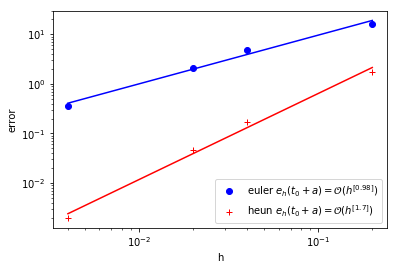

In [33]:
# comparison
fig, ax = subplots()
alpha = logfit(hlist2,error2["euler"])
ax.loglog(hlist2,error2["euler"],'bo',label='euler $e_h(t_0+a)=\mathcal{O}(h^{'+str(np.round(alpha[0],2))+'})$')
ax.loglog(hlist2,10**alpha[1]*hlist2**alpha[0],'b')

alpha = logfit(hlist2,error2["heun"])
ax.loglog(hlist2,error2["heun"],'r+',label='heun $e_h(t_0+a)=\mathcal{O}(h^{'+str(np.round(alpha[0],1))+'})$')
loglog(hlist2,10**alpha[1]*hlist2**alpha[0],'r')
xlabel("h")
ylabel("error")
legend()